In [1]:
### KEY ITEMS DEFINED
#libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

#tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
#models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
#defining key models
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=7)
dt = DecisionTreeRegressor(max_depth=10,random_state=27)
rf = RandomForestRegressor(n_estimators=20, random_state=1)
#PCC df and lists
pcc_df = pd.DataFrame(columns=["PCC"])
mae_df = pd.DataFrame(columns=["MAE"])
rmse_df = pd.DataFrame(columns=["RMSE"])
lr_avg_pcc = []
knn_avg_pcc = []
dt_avg_pcc = []
rf_avg_pcc = []
lr_avg_mae = []
knn_avg_mae= []
dt_avg_mae = []
rf_avg_mae = []
lr_avg_rmse = []
knn_avg_rmse= []
dt_avg_rmse = []
rf_avg_rmse = []

#files
files = ['BioEngineeringPV', 'BSB_BuildingPV', 'BSB_LibraryPV', 'CSC_BuildingPV', 'CUP_PV', 'EBU2_A_PV', 'EBU2_B_PV', 'ElectricShopPV', 'GarageFleetsPV', 'GilmanParkingPV', 'HopkinsParkingPV', 'KeelingA_PV', 'KeelingB_PV', 'KyoceraSkylinePV', 'LeichtagPV', 'MayerHallPV', 'MESOM_PV', 'OslerParkingPV', 'PowellPV', 'PriceCenterA_PV', 'PriceCenterB_PV', 'SDSC_PV', 'SME_SolarPV', 'StephenBirchPV']

#workflow function
def workflow(x,y):
    #defining global variables
    global y_test
    global y_pred
    #data prep
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
    #create normalizer
    min_max_scaler = MinMaxScaler()
    #reshape the data
    x_train = np.array(x_train).reshape(-1,1)
    x_test = np.array(x_test).reshape(-1,1)
    #normalize data
    x_train_norm = min_max_scaler.fit_transform(x_train)
    x_test_norm = min_max_scaler.fit_transform(x_test)

    #LR model
    #create model
    model = lr
    #print model name
    print("Model:", model)
    #fit model to train data
    model.fit(x_train_norm, y_train)
    #predict
    y_pred = model.predict(x_test_norm)
    #evaluate
    corr, _ = pearsonr(y_pred, y_test)
    pcc = ('%.4f' % corr)
    lr_avg_pcc.append(pcc)
    lr_avg_mae.append(mean_absolute_error(y_test,y_pred))
    lr_avg_rmse.append(math.sqrt(mean_squared_error(y_test,y_pred)))

    #KNN model
    #create model
    model = knn
    #print model name
    print("Model:", model)
    #fit model to train data
    model.fit(x_train_norm, y_train)
    #predict
    y_pred = model.predict(x_test_norm)
    #evaluate
    corr, _ = pearsonr(y_pred, y_test)
    pcc = ('%.4f' % corr)
    knn_avg_pcc.append(pcc)
    knn_avg_mae.append(mean_absolute_error(y_test,y_pred))
    knn_avg_rmse.append(math.sqrt(mean_squared_error(y_test,y_pred)))

    #DT model
    #create model
    model = dt
    #print model name
    print("Model:", model)
    #fit model to train data
    model.fit(x_train_norm, y_train)
    #predict
    y_pred = model.predict(x_test_norm)
    #evaluate
    corr, _ = pearsonr(y_pred, y_test)
    pcc = ('%.4f' % corr)
    dt_avg_pcc.append(pcc)
    dt_avg_mae.append(mean_absolute_error(y_test,y_pred))
    dt_avg_rmse.append(math.sqrt(mean_squared_error(y_test,y_pred)))

    #RF model
    #create model
    model = rf
    #print model name
    print("Model:", model)
    #fit model to train data
    model.fit(x_train_norm, y_train)
    #predict
    y_pred = model.predict(x_test_norm)
    #evaluate
    corr, _ = pearsonr(y_pred, y_test)
    pcc = ('%.4f' % corr)
    rf_avg_pcc.append(pcc)
    rf_avg_mae.append(mean_absolute_error(y_test,y_pred))
    rf_avg_rmse.append(math.sqrt(mean_squared_error(y_test,y_pred)))

In [4]:
for file in files:
    #loading data
    df = pd.read_csv('/Users/farihahahmed/Documents/Recs/Microgrid paper/PVGenerator/%s.csv' % file) 
    df["DateTime"] = pd.to_datetime(df["DateTime"])
    df.sort_values(by="DateTime", inplace=True)
    df.reset_index(inplace=True,drop=True)
    #delete unnecessary datetime column
    df.drop("DateTime", inplace=True, axis=1)

    # rename RealPower column to Present
    df.rename(columns = {'RealPower':'Present'}, inplace = True)
    # create a duplicate column called Future
    df['Future'] = df['Present']
    # shift up Future's values by one row
    df['Future'] = df['Future'].shift(-1)
    # delete last row
    df = df.head(df.shape[0] -1)
    # create input and output
    x = df['Present']
    y = df['Future']
    # workflow
    workflow(x,y)

Model: LinearRegression()
Model: KNeighborsRegressor(n_neighbors=7)
Model: DecisionTreeRegressor(max_depth=10, random_state=27)
Model: RandomForestRegressor(n_estimators=20, random_state=1)
Model: LinearRegression()
Model: KNeighborsRegressor(n_neighbors=7)
Model: DecisionTreeRegressor(max_depth=10, random_state=27)
Model: RandomForestRegressor(n_estimators=20, random_state=1)
Model: LinearRegression()
Model: KNeighborsRegressor(n_neighbors=7)
Model: DecisionTreeRegressor(max_depth=10, random_state=27)
Model: RandomForestRegressor(n_estimators=20, random_state=1)
Model: LinearRegression()
Model: KNeighborsRegressor(n_neighbors=7)
Model: DecisionTreeRegressor(max_depth=10, random_state=27)
Model: RandomForestRegressor(n_estimators=20, random_state=1)
Model: LinearRegression()
Model: KNeighborsRegressor(n_neighbors=7)
Model: DecisionTreeRegressor(max_depth=10, random_state=27)
Model: RandomForestRegressor(n_estimators=20, random_state=1)
Model: LinearRegression()
Model: KNeighborsRegress

In [5]:
pcc_df.loc['LR']=np.mean(np.array(lr_avg_pcc).astype(float))
pcc_df.loc['KNN']=np.mean(np.array(knn_avg_pcc).astype(float))
pcc_df.loc['DT']=np.mean(np.array(dt_avg_pcc).astype(float))
pcc_df.loc['RF']=np.mean(np.array(rf_avg_pcc).astype(float))
print(pcc_df)

          PCC
LR   0.984767
KNN  0.981546
DT   0.969075
RF   0.973513


In [6]:
predicted = y_pred[:480]
actual = y_test[:480]

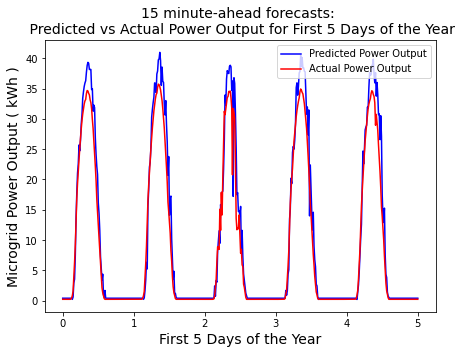

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import math

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)

#plt.ylim(0, 0.5)

# Using Numpy to create an array X
x_axis = np.linspace(0, 5, num=480)
  
# Plotting both the curves simultaneously
plt.plot(x_axis, predicted, color='b', label='Predicted Power Output')
plt.plot(x_axis, actual, color='r', label='Actual Power Output')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("First 5 Days of the Year", fontsize=14)
plt.ylabel("Microgrid Power Output ( kWh )", fontsize=14)
plt.title("15 minute-ahead forecasts: \n Predicted vs Actual Power Output for First 5 Days of the Year", fontsize=14)
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='upper right')

# To load the display window
plt.show()

In [20]:
mae_df.loc['LR']=np.mean(np.array(lr_avg_mae).astype(float))
mae_df.loc['KNN']=np.mean(np.array(knn_avg_mae).astype(float))
mae_df.loc['DT']=np.mean(np.array(dt_avg_mae).astype(float))
mae_df.loc['RF']=np.mean(np.array(rf_avg_mae).astype(float))
print(mae_df)

          MAE
LR   4.094891
KNN  4.364830
DT   4.341499
RF   4.689293


In [21]:
rmse_df.loc['LR']=np.mean(np.array(lr_avg_rmse).astype(float))
rmse_df.loc['KNN']=np.mean(np.array(knn_avg_rmse).astype(float))
rmse_df.loc['DT']=np.mean(np.array(dt_avg_rmse).astype(float))
rmse_df.loc['RF']=np.mean(np.array(rf_avg_rmse).astype(float))
print(rmse_df)

         RMSE
LR   6.946884
KNN  7.120282
DT   7.222970
RF   7.650234
